# What Numpy is

Numpy is a python library for efficient operations with vectors, matrices an n-dimensional arrays. In this tutorial you will get to know some numpy basics and use them to write your own molecular dynamics (MD) code.

# Import of Numpy
first of all we need to import numpy. Typically numpy is given the name "np" when it is imported.

In [4]:
import numpy as np

# Creation of numpy arrays

Numpy arrays can be created for example using:  
np.zeros(shape) --> array filled with zeros  
np.ones(shape) --> array fille with ones  
np.random.random(shape) --> array filled with random numbers in the interval [0,1)  

For example:

In [5]:
example_array = np.ones((2, 3))
print(example_array)

[[1. 1. 1.]
 [1. 1. 1.]]


Create an array filled with zeros and one filled with random numberers in the interval [0,1), each with a shape (5, 2).

In [ ]:
my_zeros_array = # your code goes here
my_random_array = # your code goes here

print(my_zeros_array)
print(my_random_array)

In [7]:
my_zeros_array = np.zeros((5, 2))
my_random_array = np.random.random((5, 2))

print("Zeros Array:")
print(my_zeros_array)
print("\nRandom Array:")
print(my_random_array)

Zeros Array:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

Random Array:
[[0.38282138 0.99858038]
 [0.74100864 0.9870134 ]
 [0.02296771 0.44322135]
 [0.35596449 0.96724142]
 [0.09498948 0.30669306]]


Numpy arrays can also be created from lists using the np.array() function. Create numpy arrays from the following two lists!

In [ ]:
atom1_xyz = [5, 2, 8]
atom2_xyz = [8, 4, 6]

atom1_xyz_np = # your code goes here
atom2_xyz_np = # your code goes here

print(atom1_xyz_np)
print(atom2_xyz_np)

In [8]:
atom1_xyz = [5, 2, 8]
atom2_xyz = [8, 4, 6]

atom1_xyz_np = np.array(atom1_xyz)
atom2_xyz_np = np.array(atom2_xyz)

print(atom1_xyz_np)
print(atom2_xyz_np)

[5 2 8]
[8 4 6]


# Basic Operations

Lets say we want to calculate the vector pointing from atom1 to atom2. In pure python we would need a loop iterarting over the two vectors. For example like this:

In [9]:
vec = []
for i in range(len(atom1_xyz)):
    vec.append(atom2_xyz[i] - atom1_xyz[i])

print(vec)
    

[3, 2, -2]


Using numpy arrays this is a lot easier and faster. For two arrays of the same shape "+" "-" "/" "*" operations will be applied elementwise to the whole arrays. Calculate the vector pointing from atom1 to atom2 using numpy!

In [ ]:
vec = # your code goes here
print(vec)

In [10]:
# Assumes atom1_xyz_np and atom2_xyz_np from the previous cell have been defined
vec = atom2_xyz_np - atom1_xyz_np
print(vec)

[ 3  2 -2]


We can not only use these operations for two arrays of the same shape. Whenever each dimension of the two arrays has either the same size or one of them has size 1, numpy broadcasts the smaller array to the shape of the larger array. Lets see how this works in an example:

In [12]:
a = np.array([[2, 1], 
              [3, 4], 
              [9, 2], 
              [7, 1]])           

The array a has the shape (4, 2). In the first dimension there are 4 entries and in the second dimension there are 2 entries.

In [13]:
b = np.array([[2, 3]])

The array b has the shape (1, 2). In the first dimension one of them has the size 1. In the second dimension they both have the same size (2). Because all dimensions have eighter equal size or one of them is 1 numpy will be able to braodcast b to the shape of a. That is why we can for example do:

In [14]:
c = a * b
print(c)

[[ 4  3]
 [ 6 12]
 [18  6]
 [14  3]]


When we combine two arrays with different numbers of dimensions, all missing dimensions starting from the last dimension are treates as dimension with size one. For example:

In [15]:
a = np.array([[2, 1], 
              [3, 4], 
              [9, 2], 
              [7, 1]]) # has shape (4, 2)
d = np.array([5])  # has shape (1) and is treated like shape (1, 1)

print(a - d)

[[-3 -4]
 [-2 -1]
 [ 4 -3]
 [ 2 -4]]


We can alos do the same with a numpy array and somthing that is convertible into a numpy array. So, a shortcut for the example above would be:

In [16]:
print(a - 5)

[[-3 -4]
 [-2 -1]
 [ 4 -3]
 [ 2 -4]]


Use broadcasting to caculate all the vectors from atom1 to all other atoms! other_atoms is a 2d array where the first dimension represents different atoms and the second dimension represents the x, y and z coordinates.

In [ ]:
atom1 = np.array([5, 2, 8])
other_atoms = np.array([[5, 1, 4],
                        [8, 4, 6],
                        [3, 2, 4],
                        [9, 7, 3]])

vectors_from_atom1_to_all_others = # your code goes here
print(vectors_from_atom1_to_all_others)

In [17]:
atom1 = np.array([5, 2, 8])
other_atoms = np.array([[5, 1, 4],
                        [8, 4, 6],
                        [3, 2, 4],
                        [9, 7, 3]])

vectors_from_atom1_to_all_others = other_atoms - atom1
print(vectors_from_atom1_to_all_others)

[[ 0 -1 -4]
 [ 3  2 -2]
 [-2  0 -4]
 [ 4  5 -5]]


# Indexing

Now that we have caclulated some things we also want to access specific numbers in our result arrays. Numpy arrays can be indexed or sliced much like python lists. For example:

In [18]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print(a[3])     # a at the position 3 (keep in mind python counts from 0!)
print(a[2:])    # all numbers from position 2 to the end
print(a[2:8])   # all numbers from position 2 to (not including) position 8
print(a[2:8:2]) # every second number in the same range as above
print(a[:-2])   # all numbers except for the last two

4
[ 3  4  5  6  7  8  9 10]
[3 4 5 6 7 8]
[3 5 7]
[1 2 3 4 5 6 7 8]


For higherdimensional arrays idexes for the different dimensions are separated by kommas. For example:

In [19]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print(a[0, 1]) # the element in the row 0 and column 1
print(a[0, :]) # all elements in row 0
print(a[:, :-1]) # all elements in all columns except for the last culumn

2
[1 2 3]
[[1 2]
 [4 5]
 [7 8]]


Try to slice out the following block from the array a!

In [ ]:
block = np.array([[5, 6],
                  [8, 9]])

slice_of_a = a[# your code goes in here]
    
    
if np.array_equal(block, slice_of_a):
    print('That is correct!')
else:
    print('Sorry you have sliced out\n', slice_of_a, 'instead')

In [20]:
# This code assumes the 'a' from the previous cell is defined as:
# a = np.array([[1, 2, 3],
#               [4, 5, 6],
#               [7, 8, 9]])

block = np.array([[5, 6],
                  [8, 9]])

# We want rows starting from index 1 and columns starting from index 1.
slice_of_a = a[1:, 1:]


if np.array_equal(block, slice_of_a):
    print('That is correct!')
else:
    print('Sorry you have sliced out\\n', slice_of_a, 'instead')

That is correct!


But this is not all. We can also do more fancy indexing. If we compare two arrays or an array with something that can be broadcasted to the same shape, we get an array of booleans returned. This array is the result of an elementwise comparison. Such boolean arrays can also be used for indexing. Lets see how this works:

In [21]:
a = np.array([[2, 3, 5],
              [5, 2, 3],
              [3, 5, 2]])

print(a > 2) # we could also use "==" "<" ">" "<=" ">=" "!="

[[False  True  True]
 [ True False  True]
 [ True  True False]]


Lets see how we use such boolean arrays for indexing:

In [22]:
a = np.array([[2, 3, 5],
              [5, 2, 3],
              [3, 5, 2]])

a[a > 2] += 1 # here we add one to each value larger then 2

print(a)

[[2 4 6]
 [6 2 4]
 [4 6 2]]


Set all numbers in a which equal 2, to 0.

In [ ]:
a[?] =  # your code goes in here
print(a)

In [23]:
# This code assumes the 'a' from the previous cell is defined as:
# a = np.array([[2, 3, 5],
#               [5, 2, 3],
#               [3, 5, 2]])

a[a == 2] = 0
print(a)

[[0 4 6]
 [6 0 4]
 [4 6 0]]


# Your first own numpy MD code

Now you have learned enough to test your numpy knowledge in an exciting example. You will write your own basic MD code. For a start it will be so basic it won't even be able to simulate 256 Argon atoms. For visualization purposes and to keep it simple we will performe our simulation in a 2D square box. 

### Task 1: Add atoms!
When we create an object from our simulation class the init function will be called. So far init adds the attributes n_atoms (number of atoms) and box_size. The simulation object also needs all the atom positions and velocities.  
self.positions and self.velocities should both be 2D numpy arrays. The first dimension should have one element per atom and the second dimension should have 2 elements representing an x and y values. To distribute atoms randomly in the whole box the self.positons should contain random numbers between 0 and box_size. Velocities should contain random numbers between -0.005 and +0.005. __Add positions and velocities to the class definition below and execute the cell.__ Hint: If you restart the cell while it was still runnig you wont see any output. Use the stop button first. 

(If you have done everything correctly you should see randomly distributed atoms in the appearing plot.)

### Task 2: Make them move!
So far our atoms are not moving. We need to fix that in our run function. The velocities array contains velocities in the unit distance/step. All you need to do each step is to add the velocities to the current positions to get the new positions and to overwrite self.positions with these new postions. __Make the atoms move!__  

(If you have done everything correctly you should see the atoms move. However they wont stop at the boarders of the box.)

### Task 3: Keep them in the box!
Obviously we don't want our atoms to go outside of the box. We want to keep them in the box by enforcing periodic boundary conditions. That is where our keep_in_box function comes into play. __Use fancy indexing with boolean arrays to detect which atoms are outside the box and place them inside the box again__.

If you have completed all 3 tasks above you have just performed your fist simulation of a 2D ideal gas with your own numpy MD code. If you want to further play around with numpy and python feel free to make the simulation more complex. Add forces, add different types of atoms, introduce a black hole that eats up atoms or do what ever you like!

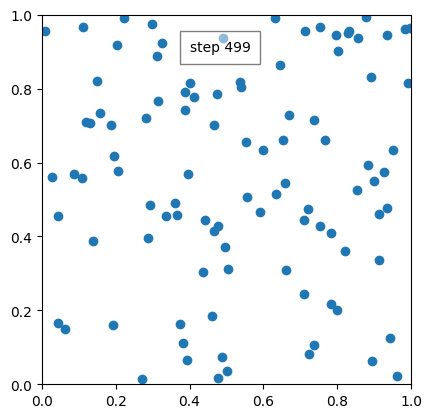

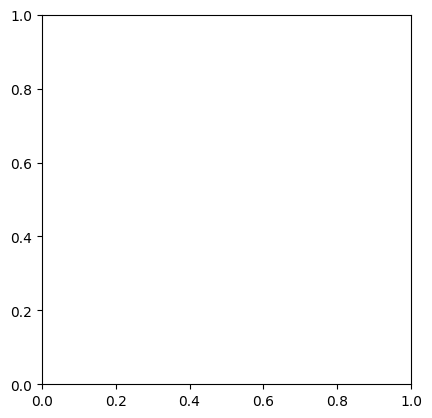

In [27]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
%matplotlib inline
import numpy as np


class Simulation:
    def __init__(self, n_atoms, box_size):
        self.n_atoms = n_atoms
        self.box_size = box_size
        self.positions = # Task 1
        self.velocities =  # Task 1
        self.fig, self.ax = plt.subplots()
    
    def run(self, n_steps):
        for step in range(n_steps):
            self.positions = self.positions  # Task 2
            self.keep_in_box()
            
            self.show(step)
    
    def keep_in_box(self):
        self.positions[...] += 0 # Task 3
        self.positions[...] -= 0 # Task 3
    
    def show(self, step):
        self.ax.scatter(self.positions[:, 0], self.positions[:, 1])
        self.ax.set_ylim((0, self.box_size))
        self.ax.set_xlim((0, self.box_size))
        self.ax.text(0.4, 0.9, 'step ' + str(step),
                     bbox={'facecolor':'white', 'alpha':0.5, 'pad':7})
        self.ax.set_aspect('equal', adjustable='box')
        clear_output(True)
        display(self.fig)
        self.ax.cla()
        


            
sim = Simulation(n_atoms=100, box_size=1)
sim.run(n_steps=500)


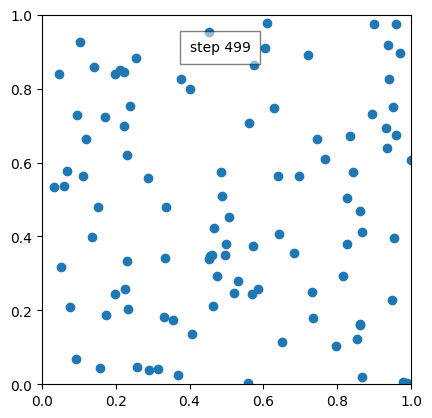

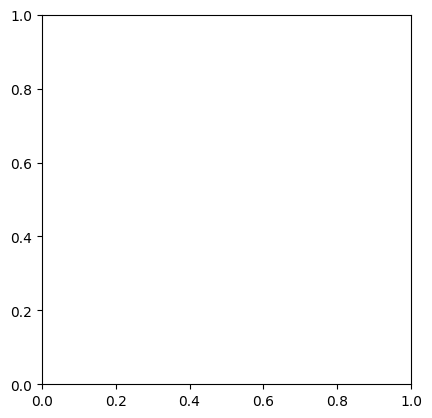

In [29]:
#static balls



import matplotlib.pyplot as plt
from IPython.display import clear_output, display
%matplotlib inline
import numpy as np


class Simulation:
    def __init__(self, n_atoms, box_size):
        self.n_atoms = n_atoms
        self.box_size = box_size
        self.positions = np.random.random((self.n_atoms, 2)) * self.box_size
        self.velocities =  (np.random.random((self.n_atoms, 2)) * 0.01) - 0.005
        self.fig, self.ax = plt.subplots()
    
    def run(self, n_steps):
        for step in range(n_steps):
            self.positions = self.positions # Task 2
            self.keep_in_box()
            
            self.show(step)
    
    def keep_in_box(self):
        self.positions[...] += 0 # Task 3
        self.positions[...] -= 0 # Task 3
    
    def show(self, step):
        self.ax.scatter(self.positions[:, 0], self.positions[:, 1])
        self.ax.set_ylim((0, self.box_size))
        self.ax.set_xlim((0, self.box_size))
        self.ax.text(0.4, 0.9, 'step ' + str(step),
                     bbox={'facecolor':'white', 'alpha':0.5, 'pad':7})
        self.ax.set_aspect('equal', adjustable='box')
        clear_output(True)
        display(self.fig)
        self.ax.cla()
        


            
sim = Simulation(n_atoms=100, box_size=1)
sim.run(n_steps=500)


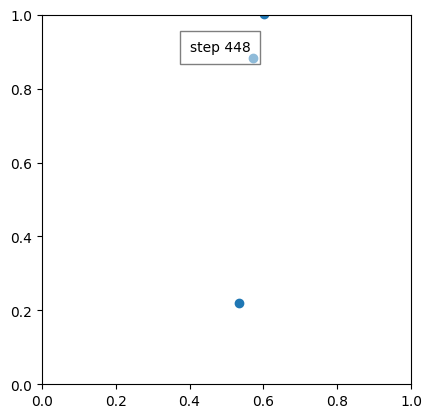

In [ ]:
#moving out


import matplotlib.pyplot as plt
from IPython.display import clear_output, display
%matplotlib inline
import numpy as np


class Simulation:
    def __init__(self, n_atoms, box_size):
        self.n_atoms = n_atoms
        self.box_size = box_size
        self.positions = np.random.random((self.n_atoms, 2)) * self.box_size
        self.velocities =  (np.random.random((self.n_atoms, 2)) * 0.01) - 0.005
        self.fig, self.ax = plt.subplots()
    
    def run(self, n_steps):
        for step in range(n_steps):
            self.positions += self.velocities  # Task 2
            self.keep_in_box()
            
            self.show(step)
    
    def keep_in_box(self):
        self.positions[...] += 0 # Task 3
        self.positions[...] -= 0 # Task 3
    
    def show(self, step):
        self.ax.scatter(self.positions[:, 0], self.positions[:, 1])
        self.ax.set_ylim((0, self.box_size))
        self.ax.set_xlim((0, self.box_size))
        self.ax.text(0.4, 0.9, 'step ' + str(step),
                     bbox={'facecolor':'white', 'alpha':0.5, 'pad':7})
        self.ax.set_aspect('equal', adjustable='box')
        clear_output(True)
        display(self.fig)
        self.ax.cla()
        


            
sim = Simulation(n_atoms=100, box_size=1)
sim.run(n_steps=500)


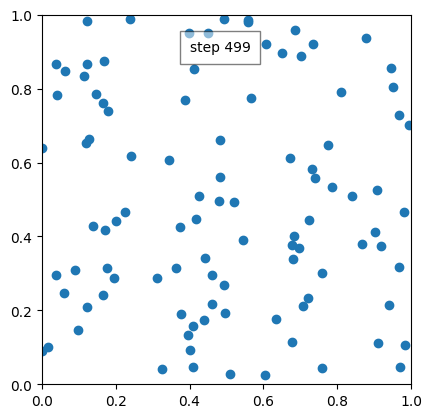

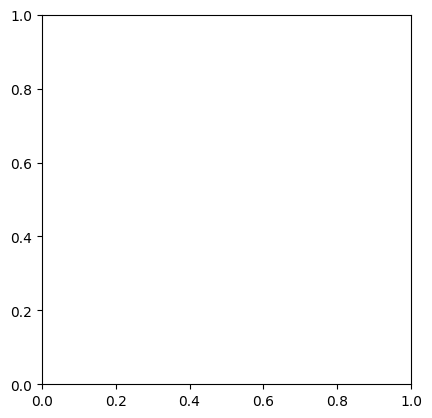

In [30]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
%matplotlib inline
import numpy as np


class Simulation:
    def __init__(self, n_atoms, box_size):
        self.n_atoms = n_atoms
        self.box_size = box_size
        # Task 1: Initialize positions with random numbers from 0 to box_size
        self.positions = np.random.random((self.n_atoms, 2)) * self.box_size
        # Task 1: Initialize velocities with random numbers from -0.005 to 0.005
        self.velocities = (np.random.random((self.n_atoms, 2)) * 0.01) - 0.005
        self.fig, self.ax = plt.subplots()
    
    def run(self, n_steps):
        for step in range(n_steps):
            # Task 2: Update positions by adding velocities
            self.positions += self.velocities
            
            self.keep_in_box()
            
            self.show(step)
    
    def keep_in_box(self):
        # Task 3: Enforce periodic boundary conditions
        # If an atom is outside the box to the right/top, subtract box_size to wrap it around.
        self.positions[self.positions > self.box_size] -= self.box_size
        # If an atom is outside the box to the left/bottom, add box_size to wrap it around.
        self.positions[self.positions < 0] -= -self.box_size
    
    def show(self, step):
        self.ax.scatter(self.positions[:, 0], self.positions[:, 1])
        self.ax.set_ylim((0, self.box_size))
        self.ax.set_xlim((0, self.box_size))
        self.ax.text(0.4 * self.box_size, 0.9 * self.box_size, 'step ' + str(step),
                     bbox={'facecolor':'white', 'alpha':0.5, 'pad':7})
        self.ax.set_aspect('equal', adjustable='box')
        clear_output(True)
        display(self.fig)
        self.ax.cla()
        
        
sim = Simulation(n_atoms=100, box_size=1)
sim.run(n_steps=500)